In [14]:
# Steven Granaturov (23756046) -- Collaborators = John Jakobsen
# Also credit to Prof. Erik Grimmelmann as I used snippets of the code
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import functools
from itertools import combinations
import numbers
from tabulate import tabulate

iris = datasets.load_iris()
print("data", iris.data)
print("target", iris.target)
X = iris.data
#print(X)
Y = iris.target
#print(Y)

data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3

In [2]:
# set up some stuff for the plots

Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

x_min, x_max = X.min() - 0.5, X.max() + 1.5

In [3]:
# get Iris classifications

IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


In [4]:
# setup Iris feature lablels

IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])


sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


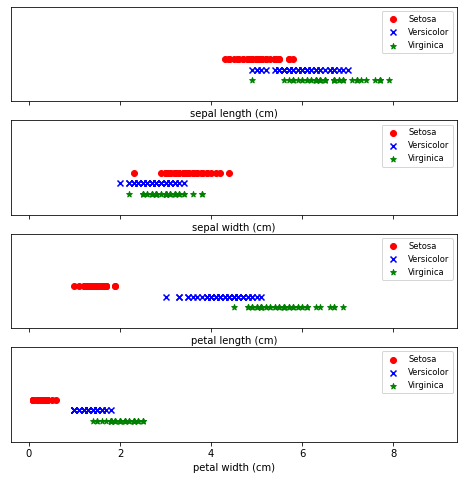

In [5]:
# plot data for all features 

plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i]
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()  

C:\Users\steve\AppData\Local\Temp\ipykernel_7700\2787705748.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k1 = np.int(k/2)


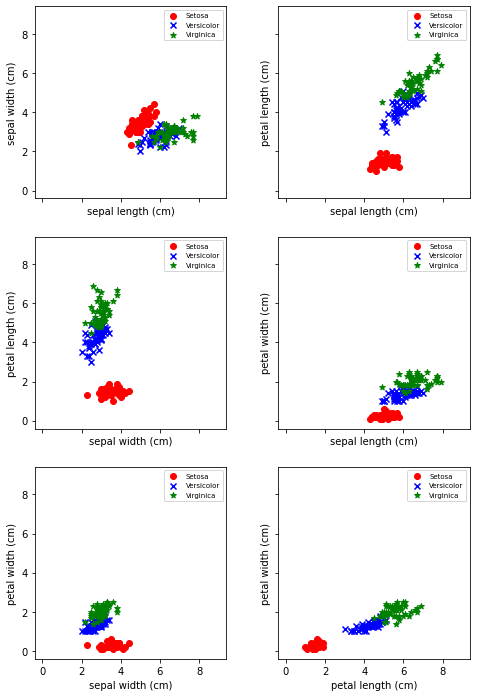

In [6]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show() 

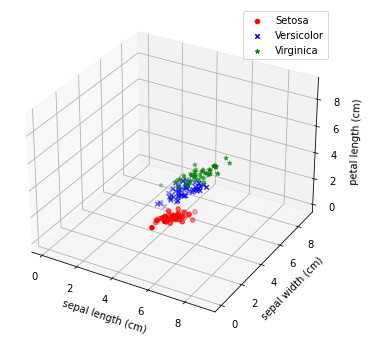

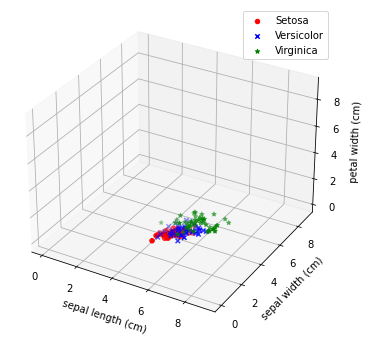

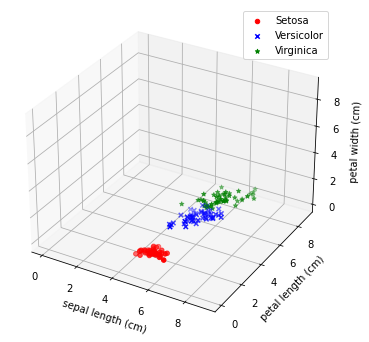

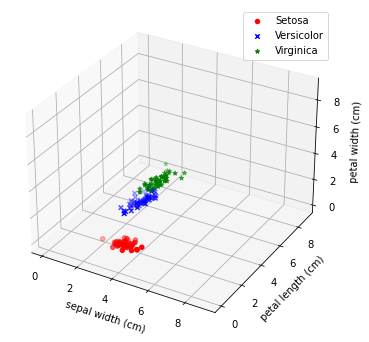

In [7]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show() 

In [8]:
# now choose the classes and features to be modeled.

# note that if more than two classes are specified, scikit learn will use a multiclass model.

# print ('\nClasses')
# for i in range(nC):
#     print (cdx[i],IrisC[cdx[i]])
    
# print ('\nFeatures')
# for i in range(nF):
#     print (fdx[i],IrisF[fdx[i]])
# build the XX and YY arrays
# these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

# X is the data
# Y is the classifiers for the data
# Example: X = [[0.2, 0.4, 0.3, 0.2], ...]
#          Y = [0 ...] -> The first data point above is classified as class 0 - "Setosa"

In [9]:
def createModel(dataset, correspondingData, selectedClasses, selectedFeatures, lossFunction, uniqueClasses):
    nC = len(selectedClasses)
    nF = len(selectedFeatures)
    i = 0
    numY = 0
    for i in range(len(correspondingData)):
        for j in range(nC):
            if correspondingData[i] == uniqueClasses[selectedClasses[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))

    j = 0
    for i in range(len(correspondingData)):
        for k in range(nC):
            if correspondingData[i] == uniqueClasses[selectedClasses[k]]:        
                YY[j] = uniqueClasses[selectedClasses[k]]
                for m in range(nF):
                    XX[j,m] = dataset[i,selectedFeatures[m]] 
                j += 1
    return (SGDClassifier(tol=1e-4, random_state=0, loss = lossFunction), XX, YY)

In [10]:
cdx = np.array([0,1,2])
fdx = np.array([0,1,2,3])

In [11]:
def testLossFunction(lossFunc):
    performanceList = []
    for featureCount in range(1,5):
        featureCombos = np.array(list(combinations(range(0,4), featureCount)))
        for fdx in featureCombos:
            clf, XX, YY = createModel(X, Y, cdx, fdx, lossFunc, IC)
            clf.fit(XX,YY)
            score = clf.score(XX,YY)
            performanceList.append(score)
    return performanceList

In [12]:
Log = testLossFunction("log")
Hinge = testLossFunction("hinge")
ModifiedHuber = testLossFunction("modified_huber")
squaredHinge = testLossFunction("squared_hinge")

#print("Mean of Log Loss Accuracies:", np.mean(Log))
#print("Mean of Hinge Loss Accuracies:", np.mean(Hinge))
#print("Mean of Modified Huber Loss Accuracies:", np.mean(ModifiedHuber))
#print("Mean of Modified Squared Hinge Accuracies:" ,np.mean(squaredHinge))

print("\n")

# 0 o Setosa red pink
# 1 x Versicolor blue lightblue
# 2 * Virginica green lightgreen
featuresList = []
for i in range(15):
    for featureCount in range(1,5):
        featureCombos = np.array(list(combinations(range(0,4), featureCount)))
        for fdx in featureCombos:
            featuresList.append(fdx)
            #print("Log Loss Accuracy: ", Log[i])
            #print("Hinge Loss Accuracy: ", Hinge[i])
            #print("Modiefied Huber Loss Accuracy: ", ModifiedHuber[i])
            #print("Squared Hinge Loss Accuracy: ", squaredHinge[i])
print(len(featuresList))
fList = featuresList[:15]


for i in range(15):
    print("\n")
    print(fList[i])
    print("Log Loss Accuracy: ", Log[i])
    print("Hinge Loss Accuracy: ", Hinge[i])
    print("Modiefied Huber Loss Accuracy: ", ModifiedHuber[i])
    print("Squared Hinge Loss Accuracy: ", squaredHinge[i])
#for i in range(len(Log)):
#    print(Log[i])
#print('\n')

#for i in range(len(Hinge)):
#    print(Hinge[i])
#print('\n')

#for i in range(len(ModifiedHuber)):
#    print(ModifiedHuber[i])
#print('\n')

#for i in range(len(squaredHinge)):
#    print(squaredHinge[i])



225


[0]
Log Loss Accuracy:  0.6733333333333333
Hinge Loss Accuracy:  0.68
Modiefied Huber Loss Accuracy:  0.3333333333333333
Squared Hinge Loss Accuracy:  0.5466666666666666


[1]
Log Loss Accuracy:  0.5333333333333333
Hinge Loss Accuracy:  0.52
Modiefied Huber Loss Accuracy:  0.5133333333333333
Squared Hinge Loss Accuracy:  0.5466666666666666


[2]
Log Loss Accuracy:  0.7066666666666667
Hinge Loss Accuracy:  0.9466666666666667
Modiefied Huber Loss Accuracy:  0.8333333333333334
Squared Hinge Loss Accuracy:  0.7933333333333333


[3]
Log Loss Accuracy:  0.9466666666666667
Hinge Loss Accuracy:  0.96
Modiefied Huber Loss Accuracy:  0.96
Squared Hinge Loss Accuracy:  0.8266666666666667


[0 1]
Log Loss Accuracy:  0.7666666666666667
Hinge Loss Accuracy:  0.7733333333333333
Modiefied Huber Loss Accuracy:  0.72
Squared Hinge Loss Accuracy:  0.74


[0 2]
Log Loss Accuracy:  0.6666666666666666
Hinge Loss Accuracy:  0.8733333333333333
Modiefied Huber Loss Accuracy:  0.7066666666666667
Squared

In [18]:
head = ["Features", "Log Loss", "Hinge Loss", "Modified Huber", "Squared Hinge"]
myData = []
for i in range(15):
    myData.append([fList[i], Log[i], Hinge[i], ModifiedHuber[i], squaredHinge[i]])
print(tabulate(myData, headers=head))

Features      Log Loss    Hinge Loss    Modified Huber    Squared Hinge
----------  ----------  ------------  ----------------  ---------------
[0]           0.673333      0.68              0.333333         0.546667
[1]           0.533333      0.52              0.513333         0.546667
[2]           0.706667      0.946667          0.833333         0.793333
[3]           0.946667      0.96              0.96             0.826667
[0 1]         0.766667      0.773333          0.72             0.74
[0 2]         0.666667      0.873333          0.706667         0.96
[0 3]         0.76          0.94              0.726667         0.626667
[1 2]         0.686667      0.886667          0.7              0.7
[1 3]         0.873333      0.893333          0.953333         0.933333
[2 3]         0.926667      0.96              0.88             0.92
[0 1 2]       0.906667      0.886667          0.76             0.713333
[0 1 3]       0.606667      0.926667          0.786667         0.913333
[0 2 3]  

C:\Users\steve\AppData\Local\Temp\ipykernel_7700\1200900818.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


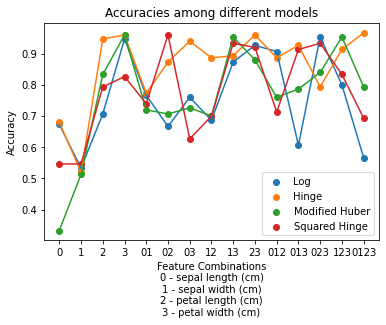

In [27]:
plt.xlabel("Feature Combinations\n0 - {0}\n1 - {1}\n2 - {2}\n3 - {3}".format(IrisF[0],IrisF[1],IrisF[2],IrisF[3]))
plt.ylabel("Accuracy")
plt.title("Accuracies among different loss functions")

featureCombos = []
for featureCount in range(1,5):
    featureCombos.extend(np.array(list(combinations(range(0,4), featureCount))))

def stringize(total, s):
    return  total + str(s)
def stringizeSuper(x):
    return functools.reduce(stringize, x, '')
xlabels = list(map(lambda x: stringizeSuper(x), featureCombos))
indices = np.arange(15*4,step=4)

plt.scatter(indices, Log, label="Log")
plt.scatter(indices, Hinge, label="Hinge")
plt.scatter(indices, ModifiedHuber, label="Modified Huber")
plt.scatter(indices, squaredHinge, label="Squared Hinge")

plt.gca().set_xticklabels(xlabels)
plt.gca().set_xticks(indices)
plt.plot(indices, Log)
plt.plot(indices, Hinge)
plt.plot(indices, ModifiedHuber)
plt.plot(indices, squaredHinge)
plt.legend()
plt.show()

After obtaining the accuracies of the model using different loss functions, I was able to organize the data into a table, followed by a graph to be able to visualize the results. Based on the accuracies, it seems that Hinge is the best loss function to use with a few feature-combination exception. For example, when we are looking at the 0-2 (Sepal length, Petal length) combination, squared hinge is most accurate. Interestingly, the Log loss function seems to be the most unstable as it jumps around a lot, and seems to favor when 2 (petal length) isn't involved.